In [1]:
# The purpose of this file is to create a price tensor for input into the neural network
# and to train the policy using Deep Deterministic Policy Gradient.
# Code is inspired by the paper "A Deep Reinforcement Learning Framework for the Financial Portfolio Management Problem"
# For more details, see: c.f https://arxiv.org/abs/1706.10059


from typing import List

import torch

from ddpgportfolio.agent.ddpg_agent import DDPGAgent
from ddpgportfolio.dataset import KrakenDataSet
from ddpgportfolio.portfolio.portfolio import Portfolio

torch.set_default_device("mps")



BATCH_SIZE = 50  # training is done in mini-batches
WINDOW_SIZE = 50  # last n timesteps for the price tensor
STEP_SIZE = 1  # for rolling window batch sampler
start_date = "2024-08-01"  # start date of trading
# DEVICE = "mps"

asset_names: List[str] = [
    "CASH",
    "SOL",
    "ADA",
    "USDT",
    "AVAX",
    "LINK",
    "DOT",
    "PEPE",
    "ETH",
    "XRP",
    "TRX",
    "MATIC",
]

portfolio = Portfolio(asset_names=asset_names, start_date=start_date)

agent = DDPGAgent(portfolio, BATCH_SIZE, WINDOW_SIZE, STEP_SIZE, 100)

# need to pretrain the agent to populate the replay buffer with experiences
agent.pre_train()
# train the agent
#agent.train()




pre-training ddpg agent started...
ReplayMemoryBuffer populating with experience...


/Users/rajmani/Documents/research/Home/python/deep-policy-gradient-portfolio/py_env/lib/python3.12/site-packages/torch/utils/_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


pretraining done
buffer size: 2876


In [2]:
agent.train()

Training Started for DDPG Agent
Episode 1 - Actor Loss: -0.0769, Critic Loss: 0.6092, Total Reward: 55.7498
Episode 2 - Actor Loss: -0.1065, Critic Loss: 0.7208, Total Reward: 14.3249
Episode 3 - Actor Loss: -0.0987, Critic Loss: 0.9142, Total Reward: 16.3424
Episode 4 - Actor Loss: -0.1050, Critic Loss: 0.7859, Total Reward: 34.8473
Episode 5 - Actor Loss: -0.1137, Critic Loss: 0.8246, Total Reward: 9.3085
Episode 6 - Actor Loss: -0.1044, Critic Loss: 0.5645, Total Reward: 25.1902
Episode 7 - Actor Loss: -0.1017, Critic Loss: 0.8910, Total Reward: -46.3547
Episode 8 - Actor Loss: -0.0913, Critic Loss: 0.6698, Total Reward: -0.9011
Episode 9 - Actor Loss: -0.0989, Critic Loss: 0.6722, Total Reward: 0.5522
Episode 10 - Actor Loss: -0.1068, Critic Loss: 0.4507, Total Reward: 41.3207
Episode 11 - Actor Loss: -0.1088, Critic Loss: 0.5747, Total Reward: 18.5648
Episode 12 - Actor Loss: -0.1090, Critic Loss: 0.4991, Total Reward: 16.8144
Episode 13 - Actor Loss: -0.1038, Critic Loss: 0.4462,

In [102]:
from utilities.noise import plot_equity_curve

In [6]:
equity_curve = plot_equity_curve(agent.pvm);

In [13]:
agent.pvm.get_memory_stack(50) * 10000
noncash_action = agent.pvm.get_memory_stack(49)  # Get action (weights) at this timestep
cash = 1 - noncash_action.sum()
action = torch.cat([cash.unsqueeze(0), noncash_action], dim=0)
portfolio_value = (
    (action * 10000).sum().item()
)  # Portfolio value

In [6]:
import numpy as np
weights = []

In [36]:
ds = KrakenDataSet(portfolio, 50, 1)
equity_curve = []
pf_previous = 10000
equity_curve.append(pf_previous)
total_reward = 0

for idx, (Xt, prev_index) in enumerate(ds):
    yt = 1 / Xt[0, :, -2]
    wt_prev = agent.pvm.get_memory_stack(prev_index)
    wt = agent.pvm.get_memory_stack(prev_index + 1)
    
    reward = portfolio.get_reward(wt, yt, wt_prev, 50)
    total_reward += reward
    pf_current = pf_previous * np.exp(total_reward.item())
    equity_curve.append(pf_current.item())
    

/Users/rajmani/Documents/research/Home/python/deep-policy-gradient-portfolio/py_env/lib/python3.12/site-packages/torch/utils/_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


In [98]:
def get_random_action(m):
    random_vec = np.random.rand(m+1)
    return random_vec/np.sum(random_vec)

In [27]:
portfolio_values

[10000,
 0.0,
 0.09802686423063278,
 0.0899629220366478,
 0.0966479703783989,
 0.07716546207666397,
 0.08185146003961563,
 0.08420158177614212,
 0.09177199006080627,
 0.08718061447143555,
 0.08394121378660202,
 0.10712285339832306,
 0.07321896404027939,
 0.06695642322301865,
 0.07277128845453262,
 0.08109881728887558,
 0.080014668405056,
 0.07386419177055359,
 0.0810336098074913,
 0.08670931309461594,
 0.08494538813829422,
 0.08578240126371384,
 0.08721521496772766,
 4.789918899536133,
 0.08361311256885529,
 0.07652586698532104,
 0.09087874740362167,
 0.08830294013023376,
 0.09169191867113113,
 0.07931390404701233,
 0.05642711743712425,
 0.049242518842220306,
 0.05907008796930313,
 0.05414903908967972,
 0.057459257543087006,
 0.06055854260921478,
 0.09198039770126343,
 0.07101405411958694,
 0.0586169958114624,
 0.06416075676679611,
 0.06265833973884583,
 0.06822557002305984,
 0.06345616281032562,
 0.05837744474411011,
 0.06177705526351929,
 0.06803027540445328,
 0.059239547699689865,
 

In [14]:
len(smoothed_equity)

2874

In [ ]:
smoothed_equity = [float(x) for x in smoothed_equity]

np.float64(10000.0665190055)

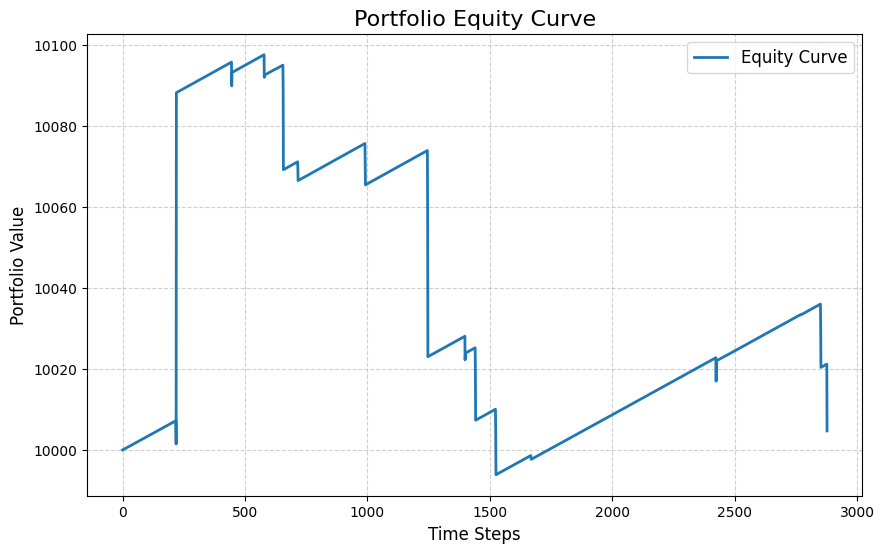

In [37]:
import matplotlib.pyplot as plt

#smoothed_equity = np.convolve(portfolio_values, np.ones(5)/5, mode='valid')
#equity_curve = portfolio_values[1:]
# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(equity_curve)), equity_curve, label="Equity Curve", linewidth=2)
plt.title("Portfolio Equity Curve", fontsize=16)
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Portfolio Value", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

In [24]:
import pandas as pd 
pd.Series(portfolio_values)

0       10000.000000
1       10000.033379
2       10000.066757
3       10000.100136
4       10000.132323
            ...     
2873    10021.111210
2874    10021.144659
2875    10021.176913
2876    10021.210363
2877    10004.707266
Length: 2878, dtype: float64

In [60]:
cpr = portfolio.get_close_price()

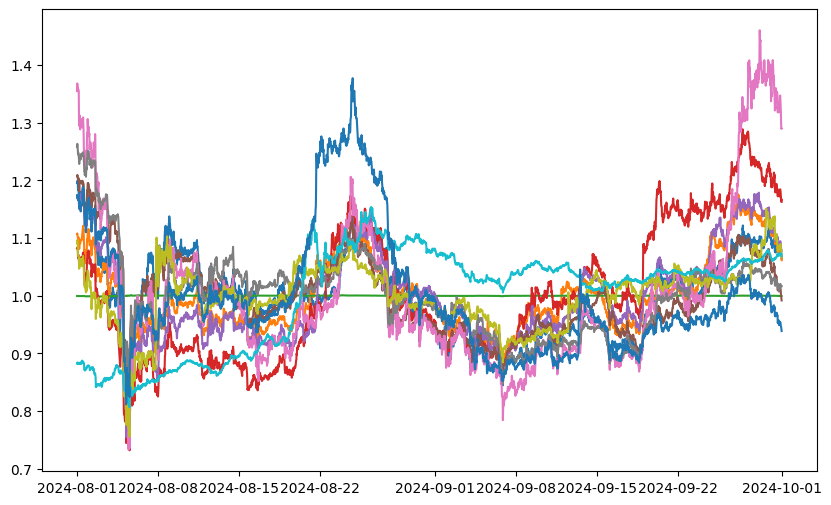

In [64]:
df_normalized = cpr / cpr.mean()
plt.figure(figsize=(10, 6))
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column);